In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import kaggle
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore')
pd.options.display.max_columns=100

In [2]:
#kaggle.api.dataset_download_files('mexwell/boat-price-prediction','D:\python data',unzip=True)

# Define dataframe and examine

In [3]:
df=pd.read_csv(r"D:\python data\Boats_Cleaned_dataset.csv")

In [4]:
df

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.00,8.50,3000.0,fiberglass,gasoline,1,150.0,NaN,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,2019-10-16,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.00,11.00,16100.0,fiberglass,diesel,2,800.0,2018.0,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019-09-24,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.00,7.42,2000.0,fiberglass,gasoline,1,75.0,2019.0,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019-11-02,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.00,10.33,12650.0,fiberglass,gasoline,2,600.0,NaN,NaN,multiple,169995.0,34834,North Charleston,SC,29405,2019-09-19,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.00,15.00,32000.0,fiberglass,diesel,2,700.0,1994.0,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018-08-29,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,19996,7127945,power,power-pontoon,Silver Wave,250 Play,2013,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,31973.0,34647,Acworth,GA,30102,2019-06-25,6,2019
18899,19997,7110910,power,power-runabout,Rinker,Captiva 200 MTX,2013,used,19.33,8.00,2795.0,fiberglass,gasoline,1,0.0,NaN,NaN,NaN,26995.0,6335,New Baltimore,MI,48047,2019-06-12,6,2019
18900,19998,6935123,power,power-bay,Blazer,2200,2019,new,22.00,7.67,NaN,fiberglass,gasoline,0,NaN,NaN,NaN,NaN,39995.0,65602,Seabrook,TX,77586,2018-12-12,12,2018
18901,19999,7079181,power,power-pontoon,Aloha,250,2004,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,16900.0,3180,Sunrise Beach,MO,65079,2019-05-10,5,2019


In [5]:
df=df.drop(columns=['Unnamed: 0','id'])

In [6]:
df.isna().mean()*100

type               0.000000
boatClass          0.000000
make               0.000000
model              0.185156
year               0.000000
condition          0.000000
length_ft          0.000000
beam_ft           34.407237
dryWeight_lb      62.471565
hullMaterial       0.000000
fuelType          15.616569
numEngines         0.000000
totalHP            4.486060
maxEngineYear     88.335185
minEngineYear     88.499180
engineCategory    55.509707
price              0.000000
sellerId           0.000000
city               0.296249
state              0.000000
zip               45.960959
created_date       0.000000
created_month      0.000000
created_year       0.000000
dtype: float64

In [7]:
df.nunique()

type                 3
boatClass           72
make               960
model             7899
year                80
condition            2
length_ft          599
beam_ft            350
dryWeight_lb      1160
hullMaterial         9
fuelType             4
numEngines           5
totalHP            286
maxEngineYear       67
minEngineYear       66
engineCategory       9
price             6074
sellerId          1375
city              1149
state               49
zip               1046
created_date      1424
created_month       12
created_year        16
dtype: int64

In [8]:
df=df.drop(columns=['Unnamed: 0','id'],errors='ignore') #we don't need these two columns

In [9]:
numerical_featues=(df.select_dtypes([int,float]).columns).tolist()
numerical_featues

['year',
 'length_ft',
 'beam_ft',
 'dryWeight_lb',
 'numEngines',
 'totalHP',
 'maxEngineYear',
 'minEngineYear',
 'price',
 'sellerId',
 'created_month',
 'created_year']

In [10]:
df.select_dtypes([object]).nunique()

type                 3
boatClass           72
make               960
model             7899
condition            2
hullMaterial         9
fuelType             4
engineCategory       9
city              1149
state               49
zip               1046
created_date      1424
dtype: int64

In [11]:
non_numerical_featues=[
    'type',
 'boatClass',
 'make',
 'model',
 'condition',
 'hullMaterial',
 'fuelType',
 'engineCategory',
 'state',
]

In [12]:
df=df[numerical_featues+non_numerical_featues]

# examine target variable: price

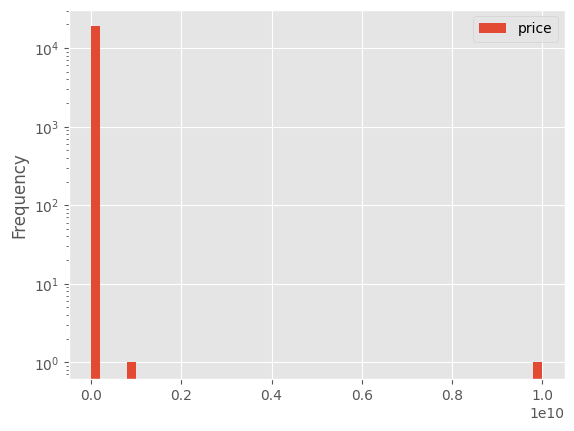

In [13]:
df.plot.hist(y='price',bins=50)
plt.yscale('log')

In [14]:
print({'mean':df['price'].mean(),
       'median':df['price'].median(),
       'std':df['price'].std(),
       'min':df['price'].min(),
       'max':df['price'].max()
       })

{'mean': 647146.880930011, 'median': 34195.0, 'std': 73095667.96677485, 'min': 500.0, 'max': 9999999999.0}


In [15]:
#big difference between mean and median. price is not distributed normally

In [16]:
#two outliers found : 9999999999 and 999999999

df=df[df['price']!=9999999999]
df=df[df['price']!=999999999]

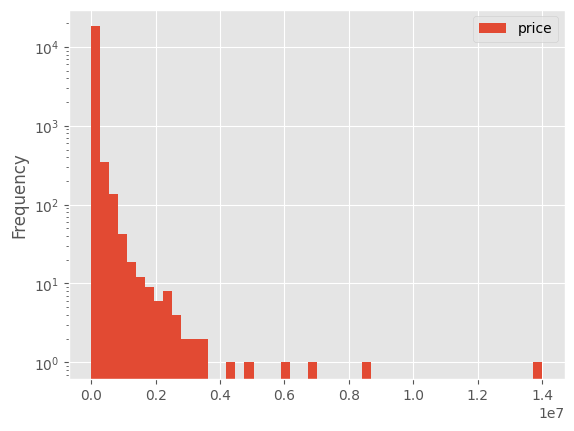

In [17]:
#price distribution after removing outliers

df.plot.hist(y='price',bins=50)
plt.yscale('log')

In [18]:
#finding extreme values that are more than 10^6:
extreme_values_percentage=round(100*len(df[df["price"]>=1e6])/len(df),2)

In [19]:
print(f'Percentage of extreme "price" values, that bigger than 10^6: {extreme_values_percentage} %')

Percentage of extreme "price" values, that bigger than 10^6: 0.41 %


In [20]:
df=df[df['price']<=1e6] #I am removing this 0.41 %, which causing high residues and variation in MAE at the end

In [21]:
print({'mean':df['price'].mean(),
       'median':df['price'].median(),
       'std':df['price'].std(),
       'min':df['price'].min(),
       'max':df['price'].max()
       })

{'mean': 56366.18546642584, 'median': 34000.0, 'std': 89356.67645562968, 'min': 500.0, 'max': 1000000.0}


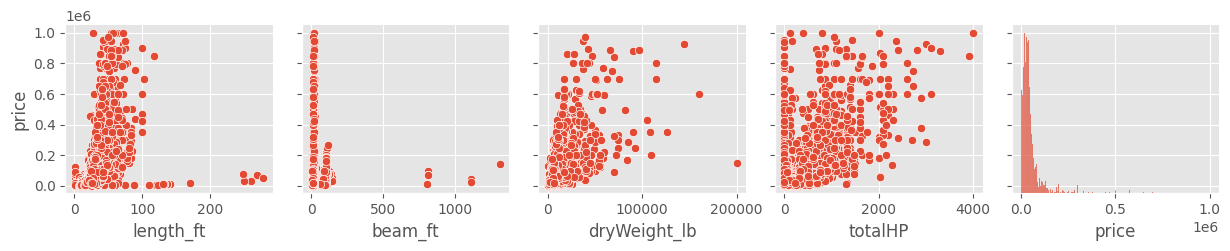

In [22]:
sns.pairplot(
    data=df[['length_ft','beam_ft','dryWeight_lb','totalHP','price']],
    y_vars='price',
    kind='scatter',
             )
plt.show()

# Imputing missing values in the most important predictors

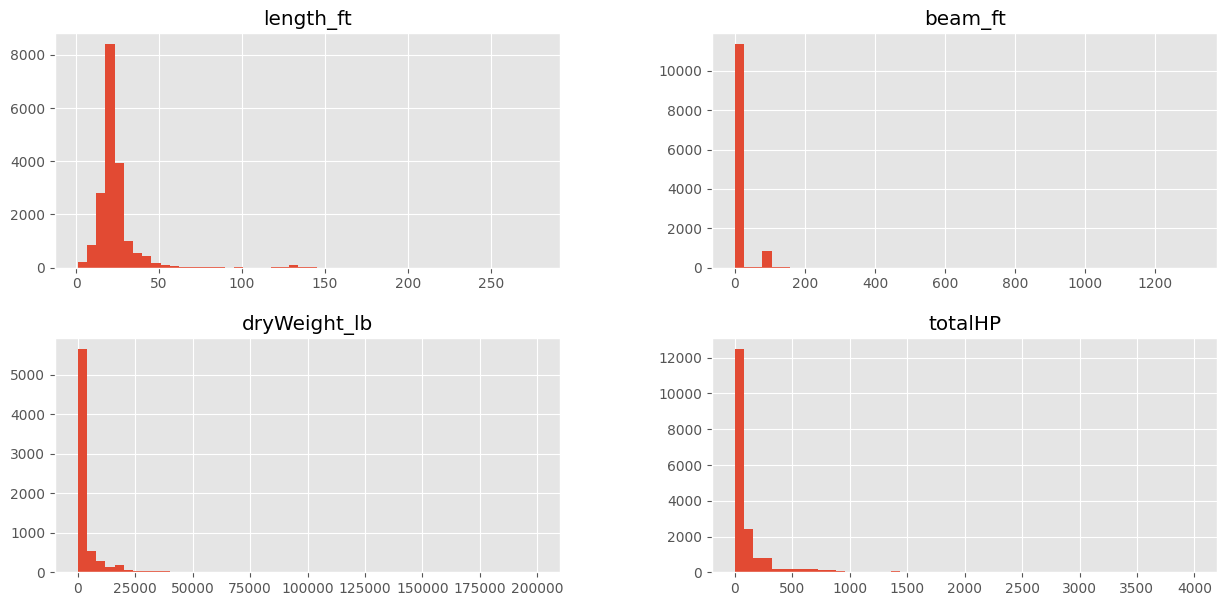

In [23]:
fig,ax=plt.subplots(figsize=(15,7))
df[['length_ft','beam_ft','dryWeight_lb','totalHP','make']].hist(ax=ax,bins=50)
plt.show()

In [24]:
df[['length_ft','beam_ft','dryWeight_lb','totalHP','make']].describe()

,length_ft,beam_ft,dryWeight_lb,totalHP
count,18824.000000,12330.000000,7071.000000,17984.000000
mean,23.572040,16.167964,4433.680727,106.307651
std,13.718905,36.922732,8932.605508,251.089188
min,1.000000,0.080000,8.000000,0.000000
25%,18.000000,7.830000,1175.000000,0.000000
50%,21.000000,8.500000,2001.000000,0.000000
75%,25.000000,9.000000,3353.000000,115.000000
max,277.900000,1311.000000,200000.000000,4000.000000


<Figure size 1500x1000 with 0 Axes>

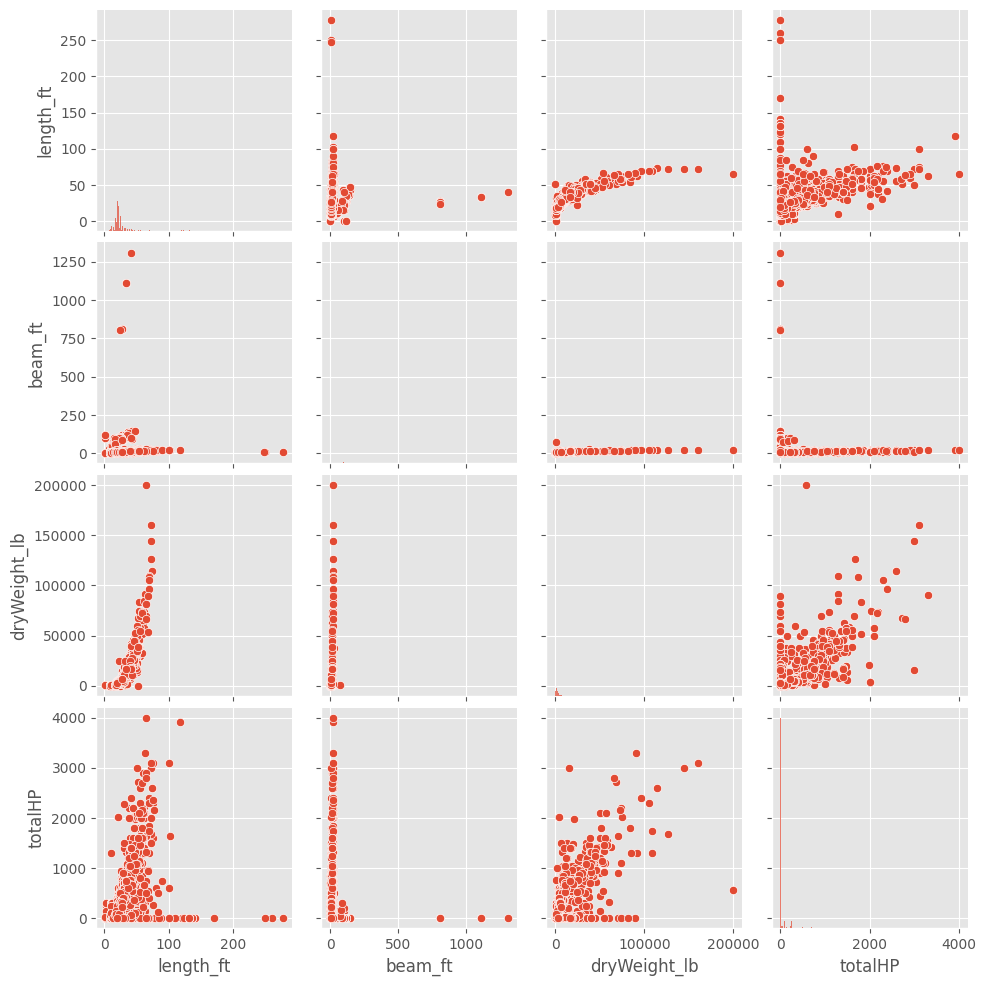

In [25]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df[['length_ft','beam_ft','dryWeight_lb','totalHP','make']])
plt.show()

In [26]:
df[['length_ft','beam_ft','dryWeight_lb','totalHP','make']].isna().mean()*100

length_ft        0.000000
beam_ft         34.498513
dryWeight_lb    62.436252
totalHP          4.462388
make             0.000000
dtype: float64

### Find correlation between values of column 1 and percentage of nan values in column 2 (both columns are numerical)

In [27]:
corr_df=pd.DataFrame(index=df.columns,columns=df.columns)

In [28]:
for col1 in df.columns:
    for col2 in df.columns:
        if df[col1].dtype == 'O' or df[col2].dtype == 'O':
            continue
        grouped_data = df.groupby(col1)[col2].apply(lambda x: x.isna().sum() / len(x))
        corr = np.corrcoef(grouped_data.index, grouped_data.values)[0, 1]
        corr_df.loc[col1, col2] = corr
        
        print(col1, col2, end='\r')




In [29]:
corr_df=corr_df.astype(float)

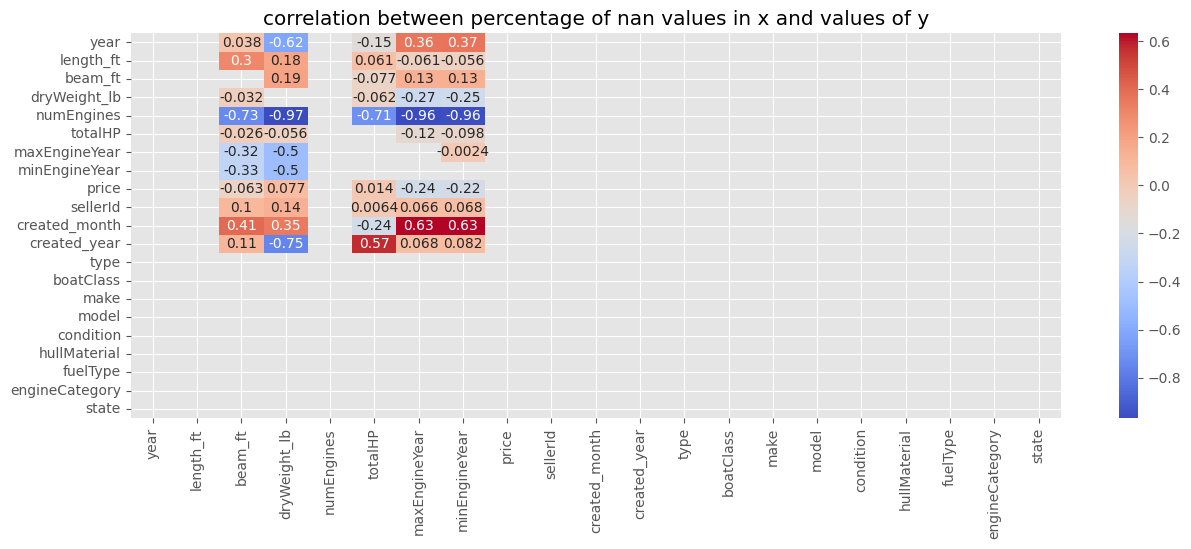

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_df,annot=True,cmap='coolwarm')
plt.title('correlation between percentage of nan values in x and values of y')
plt.show()

#example:

ax=df.groupby('year')['dryWeight_lb'].agg(['count',lambda x:(x.isna().sum()/len(x))])\
.plot(y=['count','<lambda_0>'],secondary_y='count',marker='.',figsize=(15,5),label=['count','nan percentage'])
ax.right_ax.set_yscale('log')

In [31]:
#imputing values based on the uppermentioned correlation matrix

df['dryWeight_lb']=df.groupby(['model','year','numEngines'])['dryWeight_lb'].transform(lambda x: x.fillna(x.mode()))

df['beam_ft']=df.groupby(['model','numEngines'])['beam_ft'].transform(lambda x: x.fillna(x.mode()))

df['minEngineYear']=df.groupby(['model','numEngines'])['minEngineYear'].transform(lambda x: x.fillna(x.mode()))

df['maxEngineYear']=df.groupby(['model','numEngines'])['maxEngineYear'].transform(lambda x: x.fillna(x.mode()))

#df['totalHP']=df.groupby(['model','numEngines','created_year'])['maxEngineYear'].transform(lambda x: x.fillna(x.mode()))

In [32]:
df[['length_ft','beam_ft','dryWeight_lb','totalHP','make']].isna().mean()*100

#still beam_ft and dryWeight_lb have large portion of missing values

length_ft        0.000000
beam_ft         34.535699
dryWeight_lb    62.452189
totalHP          4.462388
make             0.000000
dtype: float64

## Imputation of dryWeight_lb using Linear regression 

In [33]:
corr_1=df[['length_ft','beam_ft','dryWeight_lb','totalHP']].corr()
corr_1

#length_ft has 0% missing values and is strongly correlated with dryWeight_lb

,length_ft,beam_ft,dryWeight_lb,totalHP
length_ft,1.000000,0.020921,0.820751,0.307643
beam_ft,0.020921,1.000000,0.709374,-0.080588
dryWeight_lb,0.820751,0.709374,1.000000,0.707980
totalHP,0.307643,-0.080588,0.707980,1.000000


<Figure size 1500x500 with 0 Axes>

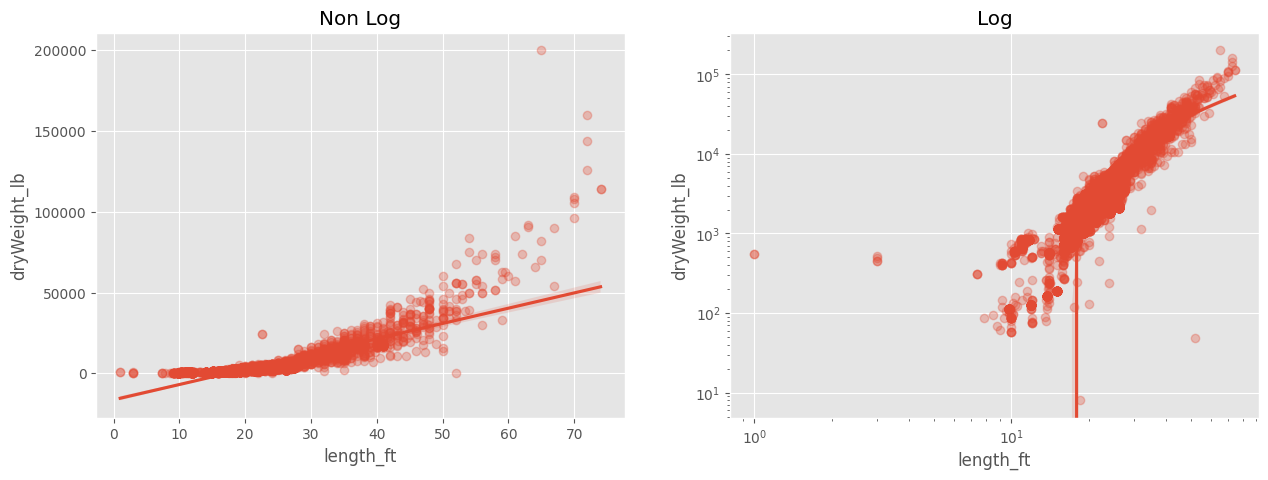

In [34]:
#impute dryWeight_lb based on the values in length_ft

plt.figure(figsize=(15,5))


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

sns.regplot(df,x='length_ft',y='dryWeight_lb',scatter_kws={'alpha': 0.3},ax=ax1)
ax1.set_title('Non Log')

sns.regplot(df,x='length_ft',y='dryWeight_lb',scatter_kws={'alpha': 0.3},ax=ax2)
ax2.set_title('Log')
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.show()

In [35]:
#when variables are in ordinary scale, the shape of the relationship resembles polinomial
#when converted in logarithmic scale, the relationship is linear between two variables

In [36]:
fitlered=df[['dryWeight_lb','length_ft']].dropna()

log_x = np.log(fitlered['length_ft'])
log_y = np.log(fitlered['dryWeight_lb'])

np.corrcoef(log_x,log_y)[0,1]

#correlation coefficient between logarithmic x and logarithmic y. there is strong positive relationship. One variable can be explained by the other

0.9012372917412643

In [37]:
# impute missing values in dryWeight_lb based on length_ft values using linear regression method

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train=df.dropna(subset=['length_ft','dryWeight_lb'])
test=df[(df['dryWeight_lb'].isna())&(df['length_ft'].notna())]

X_train = np.log(train[['length_ft']])
y_train = np.log(train['dryWeight_lb'])
X_test = np.log(test[['length_ft']])


regressor = LinearRegression()
regressor.fit(X_train,y_train)

prediction_log = regressor.predict(X_test)
prediction=np.exp(prediction_log)

df.loc[X_test.index,'dryWeight_lb']=prediction

print(f'Number of values imputed : {prediction.shape[0]}')

Number of values imputed : 11756


<Figure size 1500x500 with 0 Axes>

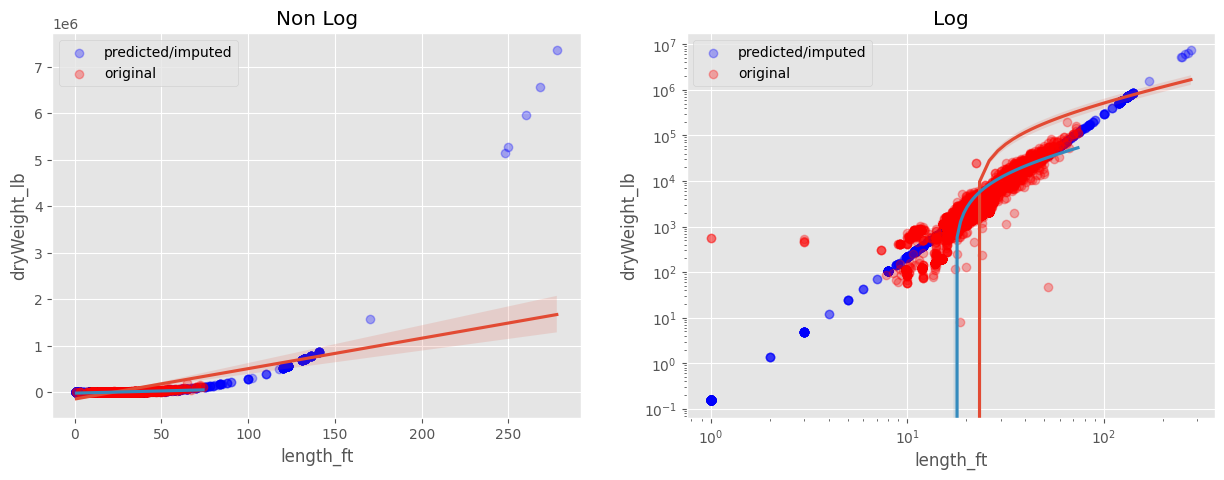

In [39]:
plt.figure(figsize=(15,5))


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

sns.regplot(data=df[df.index.isin(test.index)], x='length_ft', y='dryWeight_lb', scatter_kws={'alpha': 0.3, 'color': 'blue'}, ax=ax1,label='predicted/imputed')
sns.regplot(data=df[df.index.isin(test.index)==False], x='length_ft', y='dryWeight_lb', scatter_kws={'alpha': 0.3, 'color': 'red'}, ax=ax1,label='original')
ax1.set_title('Non Log')
ax1.legend()

sns.regplot(data=df[df.index.isin(test.index)], x='length_ft', y='dryWeight_lb', scatter_kws={'alpha': 0.3, 'color': 'blue'}, ax=ax2,label='predicted/imputed')
sns.regplot(data=df[df.index.isin(test.index)==False], x='length_ft', y='dryWeight_lb', scatter_kws={'alpha': 0.3, 'color': 'red'}, ax=ax2,label='original')
ax2.set_title('Log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()

plt.show()

In [40]:
# predicted values follow curved shape on the first graph and linear on the second, as it was thought to be

## Imputation of beam_ft

In [41]:
df[['length_ft','beam_ft','dryWeight_lb','totalHP','make']].isna().mean()*100

# there are missing values in beam_ft

length_ft        0.000000
beam_ft         34.535699
dryWeight_lb     0.000000
totalHP          4.462388
make             0.000000
dtype: float64

In [42]:
corr_2=df[['length_ft','beam_ft','dryWeight_lb','totalHP']].corr()
corr_2

,length_ft,beam_ft,dryWeight_lb,totalHP
length_ft,1.000000,0.020921,0.675422,0.307643
beam_ft,0.020921,1.000000,-0.001284,-0.080588
dryWeight_lb,0.675422,-0.001284,1.000000,0.025757
totalHP,0.307643,-0.080588,0.025757,1.000000


In [43]:
#there are some entries in beam_ft column with values: 0 and 1. beam length in feet can't be 0 or 1

df['beam_ft']=df['beam_ft'].apply(lambda x:np.nan if x<=1 else x)

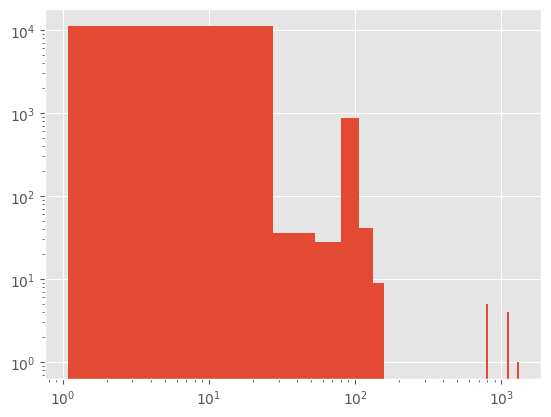

In [44]:
df['beam_ft'].hist(bins=50)
plt.xscale('log')
plt.yscale('log')

In [45]:
#there are two groups of beam_ft:
#first ranging between 1 and 30
#second ranging aroung 80-150
#small group of 60-70 entries in between

group_1=df[df['beam_ft'].between(1,30)]
group_2=df[df['beam_ft'].between(80,np.inf)]

len(group_1), len(group_2), len(df)-len(group_1)-len(group_2)

(11184, 916, 6724)

#the reason for having these groups might be due to different manufacturer standards

df['beam_ft']=df.groupby(['model'])['beam_ft'].transform(lambda x: x.fillna(x.mean()))
df['beam_ft'].isna().mean()

In [46]:
# imputate the ramaining nan values using linear regression method

<Figure size 1500x500 with 0 Axes>

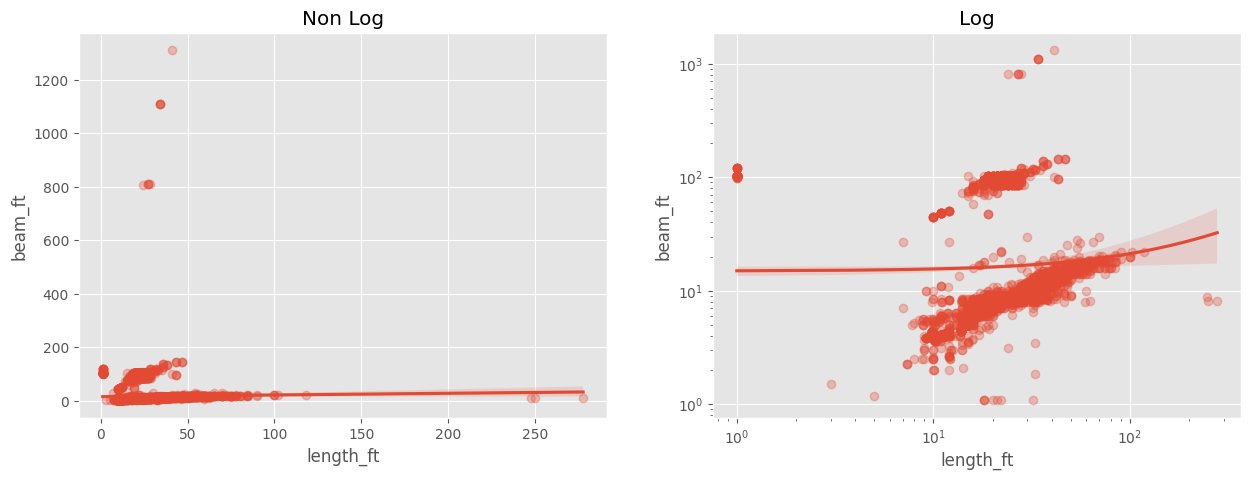

In [47]:
plt.figure(figsize=(15,5))


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

sns.regplot(df,x='length_ft',y='beam_ft',scatter_kws={'alpha': 0.3},ax=ax1)
ax1.set_title('Non Log')

sns.regplot(df,x='length_ft',y='beam_ft',scatter_kws={'alpha': 0.3},ax=ax2)
ax2.set_title('Log')
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.show()

In [48]:
train=df.dropna(subset=['beam_ft','dryWeight_lb'])
test=df[(df['beam_ft'].isna())&(df['dryWeight_lb'].notna())]

X_train = np.log(train[['dryWeight_lb']])
y_train = np.log(train['beam_ft'])
X_test = np.log(test[['dryWeight_lb']])


regressor = LinearRegression()
regressor.fit(X_train,y_train)

prediction_log = regressor.predict(X_test)
prediction=np.exp(prediction_log)

df.loc[X_test.index,'beam_ft']=prediction

print(f'Number of values imputed : {prediction.shape[0]}')

Number of values imputed : 6663


<Figure size 1500x500 with 0 Axes>

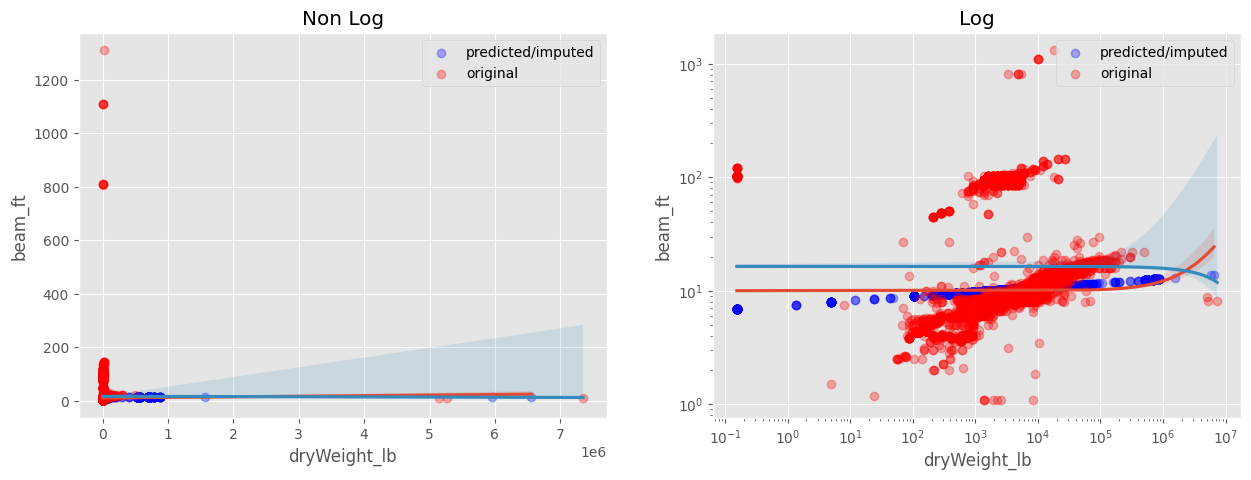

In [49]:
plt.figure(figsize=(15,5))


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

sns.regplot(data=df[df.index.isin(test.index)], x='dryWeight_lb', y='beam_ft', scatter_kws={'alpha': 0.3, 'color': 'blue'}, ax=ax1,label='predicted/imputed')
sns.regplot(data=df[df.index.isin(test.index)==False], x='dryWeight_lb', y='beam_ft', scatter_kws={'alpha': 0.3, 'color': 'red'}, ax=ax1,label='original')
ax1.set_title('Non Log')
ax1.legend()

sns.regplot(data=df[df.index.isin(test.index)], x='dryWeight_lb', y='beam_ft', scatter_kws={'alpha': 0.3, 'color': 'blue'}, ax=ax2,label='predicted/imputed')
sns.regplot(data=df[df.index.isin(test.index)==False], x='dryWeight_lb', y='beam_ft', scatter_kws={'alpha': 0.3, 'color': 'red'}, ax=ax2,label='original')
ax2.set_title('Log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()

plt.show()

In [51]:
df['beam_ft'].isna().mean()

0.0

## One-hot encoding

In [52]:
df.select_dtypes(object).nunique()

type                 3
boatClass           72
make               944
model             7842
condition            2
hullMaterial         9
fuelType             4
engineCategory       9
state               49
dtype: int64

In [53]:
for col in df.select_dtypes(object):
    if col in ['model']:
        df=df.drop(columns=col)
        continue
    dummies=pd.get_dummies(df[col],prefix=col,dummy_na=False).astype(int)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)

df.shape

(18824, 1104)

# Split data and fit to ML Model

In [54]:
X=df.drop(columns='price')
y=df['price']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
from xgboost import XGBRegressor

params={'max_depth':3,'objective':'reg:absoluteerror'}

weights = {
    'totalHP': 3.0,
    'dryWeight_lb': 1.5
}
#sample_weight = X_train[['totalHP', 'dryWeight_lb']].replace(weights).sum(axis=1)


best_model=XGBRegressor()

from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10],
            'learning_rate':[0.01,0.05,0.1,0.15]}

grid_search_cv=GridSearchCV(estimator=XGBRegressor(),
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=10)

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

In [56]:
#import pickle
#pickle.dump(best_model,open('best_model.pickle','wb'))
#best_model=pickle.load(open('best_model.pickle','rb'))

In [57]:
best_model.fit(X_train,y_train)#,sample_weight=sample_weight


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
train_prediction=best_model.predict(X_train)
test_prediction=best_model.predict(X_test)

In [59]:
from sklearn import metrics
r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'RMSE_test':rmse_test}
print(train_scores)
print(test_scores)

{'R2_train': 0.9686590360281211, 'MAE_train': 7987.651703839826, 'RMSE_train': 14772.781522145602}
{'R2_test': 0.8825195333552278, 'MAE_test': 12439.257630169428, 'RMSE_test': 32272.821143195077}


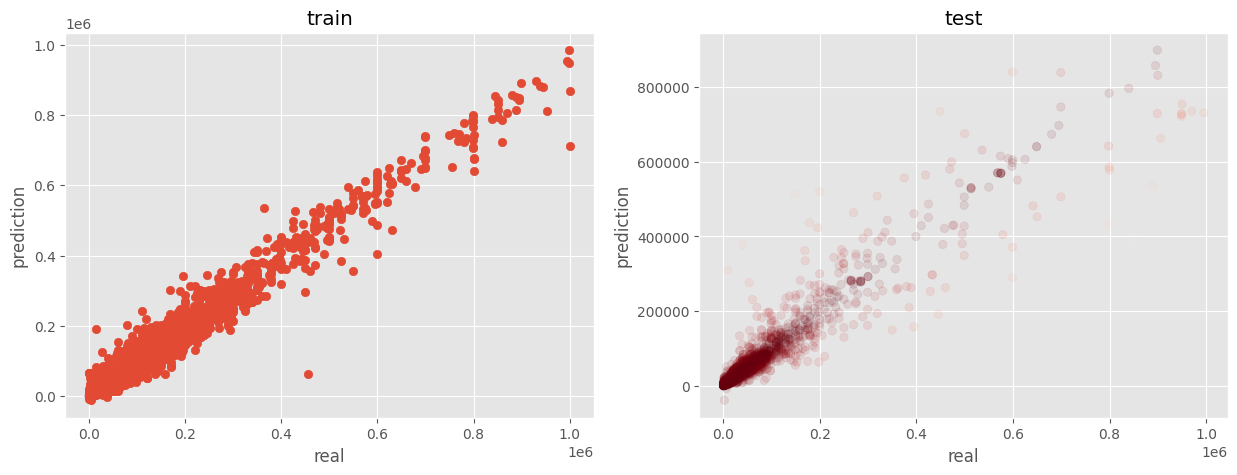

In [60]:
abs_error=np.abs(y_test-test_prediction)

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(y_train,train_prediction)
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')
ax2.scatter(y_test,test_prediction,c=abs_error,cmap='Reds_r',alpha=0.1)
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()

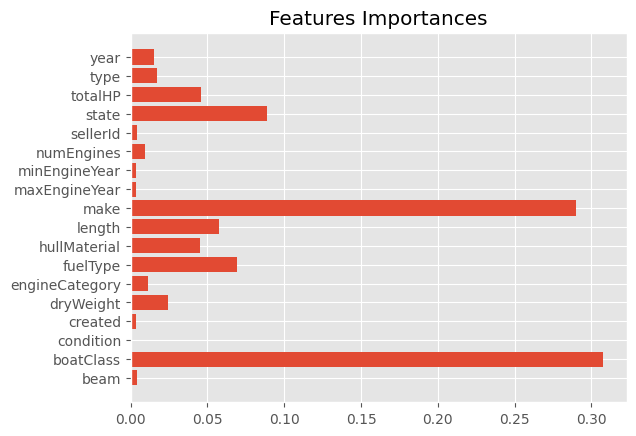

In [61]:
feature_names=best_model.feature_names_in_
weights=best_model.feature_importances_

weights_df=pd.DataFrame({'feature_names':feature_names,'weights':weights})
weights_df_grouped=weights_df.groupby(weights_df['feature_names'].str.split('_').str[0])['weights'].sum()

plt.barh(y=weights_df_grouped.index,width=weights_df_grouped.values)
plt.title('Features Importances')
plt.show()

## Error Analysis

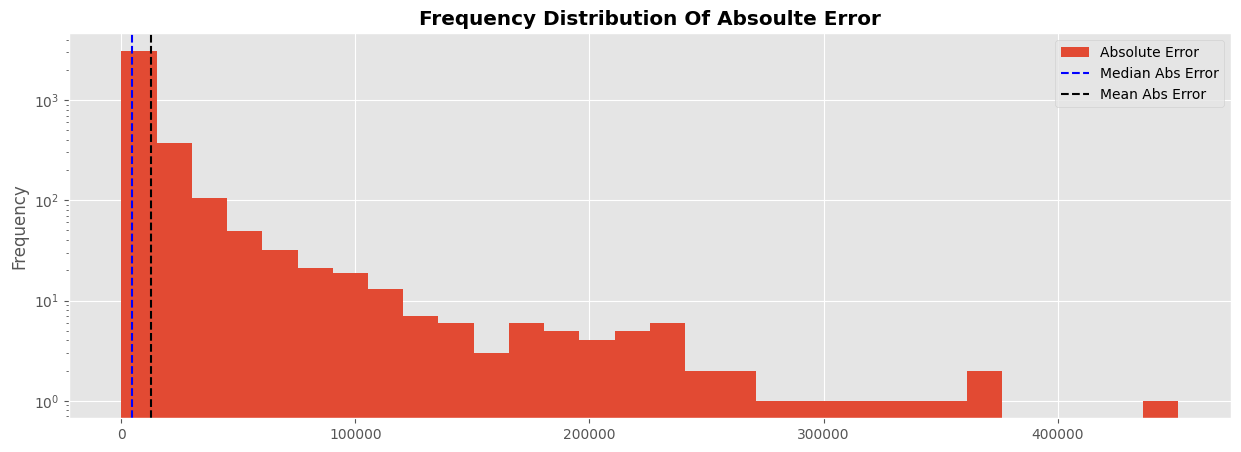

In [62]:
absolute_error=(y_test-test_prediction).abs()


fig,ax=plt.subplots(figsize=(15,5))
absolute_error.plot.hist(ax=ax,bins=30,label='Absolute Error')
ax.set_title('Frequency Distribution Of Absoulte Error',fontweight='bold')
median_abs_error=absolute_error.median()
ax.axvline(median_abs_error,label='Median Abs Error',color='blue',ls='--')
ax.axvline(mae_test,label='Mean Abs Error',color='black',ls='--')
ax.legend()
ax.set_yscale('log')
plt.show()

In [63]:
X_test_new=X_test.copy()

dummie_column_keywords=['make_','state_','type_','boatClass_','condition_','hullMaterial_','fuelType_','engineCategory_']
for dummie_column_keyword in dummie_column_keywords:
    dummie_columns=X_test_new.columns[X_test_new.columns.str.contains(dummie_column_keyword)]
    dummie_to_series=X_test_new[dummie_columns].idxmax(axis=1).str.replace(dummie_column_keyword,'')
    dummie_to_series_df=pd.DataFrame({dummie_column_keyword:dummie_to_series})
    X_test_new=X_test_new.drop(columns=dummie_columns)
    X_test_new=pd.concat([X_test_new,dummie_to_series_df],axis=1)
    print(dummie_column_keyword)

make_
state_
type_
boatClass_
condition_
hullMaterial_
fuelType_
engineCategory_


In [64]:
X_test_new['Absolute Error']=absolute_error

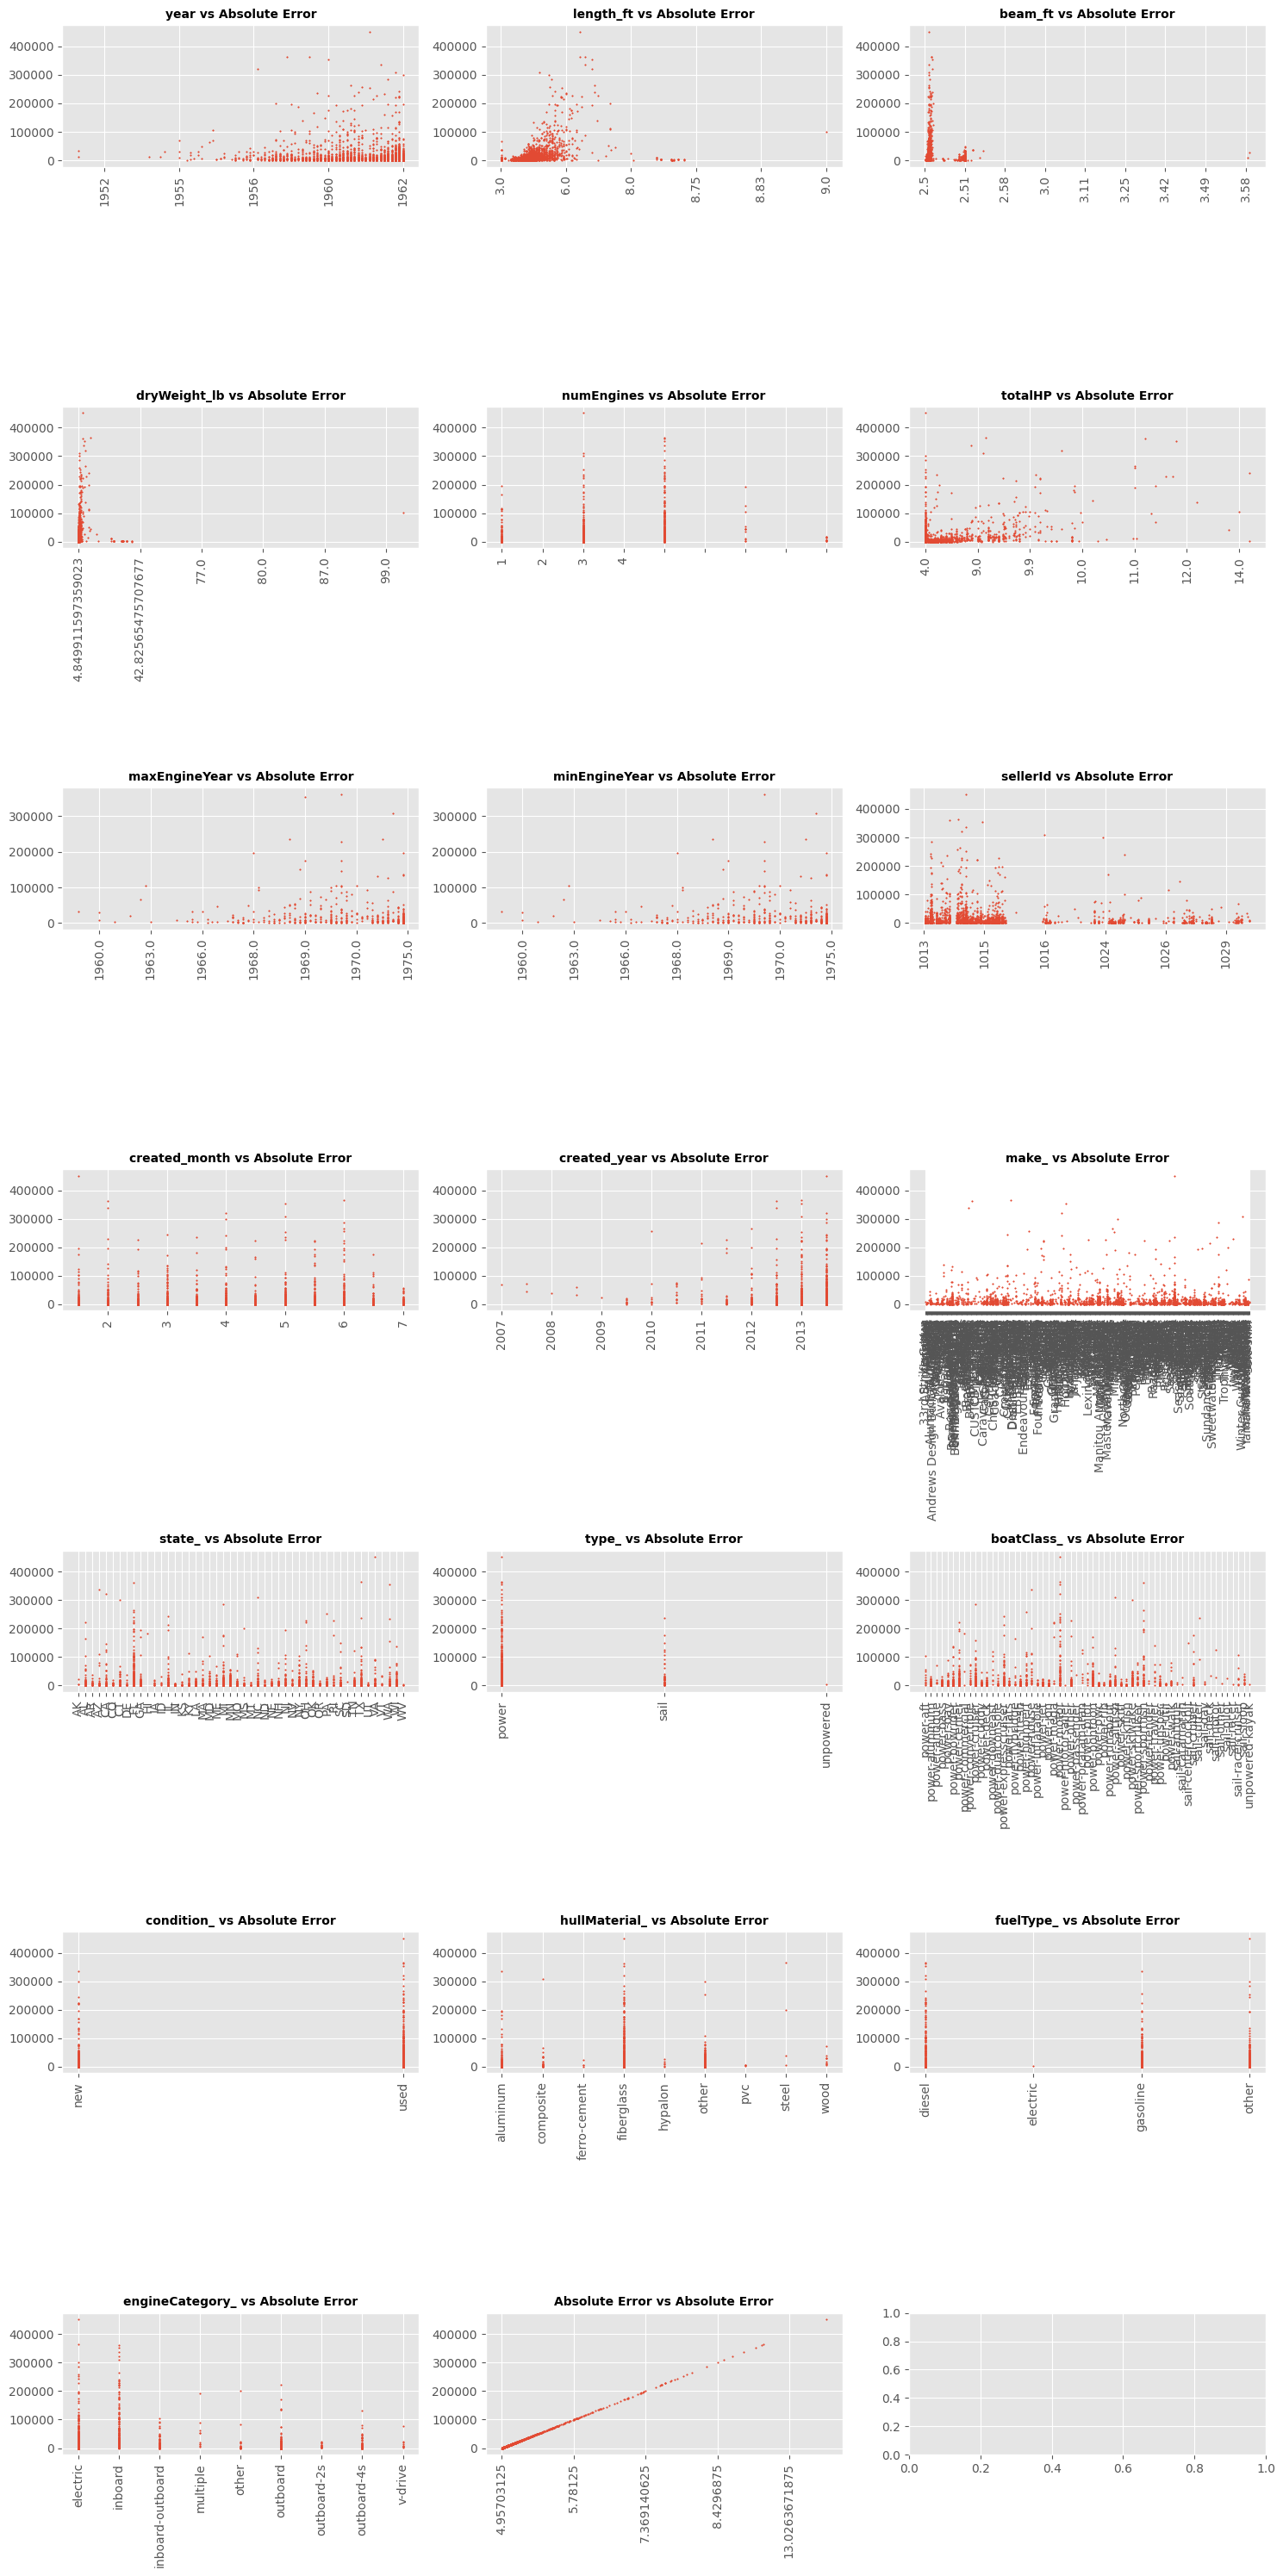

In [65]:
fig,axes=plt.subplots(7,3,figsize=(15,30))

for col,ax in zip(X_test_new.columns,axes.ravel()):
    X_test_new=X_test_new.sort_values(col)
    ax.scatter(x=X_test_new[col],y=X_test_new['Absolute Error'],s=1)
    ax.set_title(f'{col} vs Absolute Error',fontweight='bold',size=10)
    ax.set_xticklabels(X_test_new[col].unique(),rotation=90)


plt.tight_layout()
plt.show()